# **Solving 2D Poisson's Equation Using Finite Difference Method and Iterative Solvers**

**Author**: Reece Iriye

**Course**: MATH 4315 (Advanced Scientific Computing)

**Section**: Spring 2023, MWF 12:00-12:50PM, 001-LEC

**Department**: Mathematics, Dedman College of Humanities & Sciences

## **Project Description**

This project studies solving 2-D boundary value problems with finite difference schemes and iterative methods. Consider a metal plate on the unit square $\\ D = \{(x, y) : 0 ≤ x, y ≤ 1\}$. The temperature $\phi(x, y)$ satisfies Poisson’s equation:
$$
\begin{gather*}
\frac{\partial ^{2}\phi}{\partial x^2} + \frac{\partial ^{2}\phi}{\partial y^2} = f(x,y)
\end{gather*}
$$

on D with boundary conditions $\phi(x,0) = ···, \phi(x,1) = ···, \phi(0,y) = ···, \phi(1,y) = ···$.


We can solve for the temperature using the finite-difference scheme $D^{x}_{+} D^{x}_{-} w_{ij} + D^{y}_{+} D^{y}_{-} w_{ij} =
f_{ij}$ with mesh size $h = \frac{1}{n+1}$. This yields a linear system $A_{h}w_{h} = f_h$, where $w_h = \{w_{ij}\}$ is the numerical solution with components $w_{ij} ≈ \phi(x_i,y_j)$. The mesh points are given by $x_i = i \times h, y_j = j \times h$, for $i,j = 0:n+1$. 


My work is composed of three parts.


**Part I**: Pick a function $\phi(x, y)$ on my own and generate $f(x, y)$, $\phi(x, 0)$, $\phi(x, 1)$, $\phi(0, y)$, $\phi(1,y)$ based on my pick. The picked function should be smooth (e.g. the combination of trigonometric function, exponential, logarithmic, etc.). Avoid simply polynomial or function with singularities in the computational domain (e.g. $\log(x−0.5)$). I need to provide $\phi(x, y)$, $f(x,y)$, and the boundary conditions in my project report.


**Part II**: Use `Python` to solve the linear system by Jacobi’s method with $h = \frac{1}{2}, \frac{1}{4}, ... , \frac{1}{64}$.
Take $w_{ij}^{(0)} = 0$ at step $k = 0$. Take $\frac{||r_{k}||_{\infty}}{||r_{0}||_{\infty}} ≤ 10^{−8}$ for the stopping criterion, where $r_k = f_h - A_{h}w_{h}^{(k)}$ is the residual at step $k$. Note we use “$||r||_\infty = \max(abs(r))$” in Python to return the infinite norm of $r$ (why?) since $r$ is a vector-in-matrix form. The `abs()` and `max()` function should be loaded from the `numpy` package. To keep the code simple, code the numerical solution $w_h = \{w_{ij}\}$ as a matrix of dimension $(n + 2) \times (n + 2)$ containing the unknown interior temperature values and the known boundary values. Hence, in Python, the numerical solution has the form $w(i, j)$. For $i = 0 : n+1, j = 0 : n+1$, use the component form of Jacobi’s method,
$$
\begin{gather*}
\frac{1}{h^2}(4w_{ij}^{(k+1)} - w_{i+1,j}^{(k)} - w_{i-1,j}^{(k)} - w_{i,j+1}^{(k)} - w_{i,j-1}^{(k)}) = f_{ij}
\end{gather*}
$$

and solve for $w_{ij}^{(k+1)}$ using loops over $i$ and $j$. Do not form the full matrix $A_h$ (because it is sparse and that would waste memory). You will need two versions of the vector $w_{ij}$, one for the current step $(k + 1)$ and one for the previous step $(k)$. For this part, you result will include one figure composed of six sub-figures and a table as described below.

1. For each value of $h$ from $\frac{1}{4}$, $\frac{1}{8}$, and $\frac{1}{16}$, plot the computed temperature $w_{ij}$ (including the boundary values) at the final step using a contour plot and a mesh plot (type `help contour` and `help mesh` in Python for instructions). Use `subplot` to get several graphs on one plot, as in the lecture notes.

2. Find the errors of the numerical solution by comparing with the true values and study the order of accuracy `error=max(abs(w-wtrue))`. A tabular output of four columns and six rows is required as:


| h  | error |  ratio  | order  |
|:--:|:-----:|:-------:|:------:|
|... | ...   |  ...    | ...    |


where $ratio=error(2h)/error(h)$ and $order=\log_2(ratio)$.


3. Give a brief writeup (use the Markdown of Jupyter notebook) to describe my results, connecting to the theory. For example, give a column by column description of the data pattern in the table, predict the asymptotic behavior and explained why.


**Part III**: Repeat `Part II` with Gauss-Seidel’s method and SOR method ($w_{*} = \frac{2}{1+ \sqrt{1−\cos^2(\pi \times h)}}$)
You need to first figure out the component form of both methods as in Eq. (2). You can check errors and graphs to make sure the coding is correct. However, for this part, you only need to submit a 6 by 4 tabular data of iteration numbers of all three methods at different $h$. Describe the table and explain the pattern.

| h  | Jacobi |  Gauss-Sidel  | SOR  |
|:--:|:-----:|:-------:|:------:|
|... | ...   |  ...    | ...    |

In [5]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi, log

## **Overview of the Poisson Equation**

The Poisson equation is used heavily in the context of Partial Differential Equations and arises in many areas of physics—including electrostatics, fluid mechanics, and heat transfer. In 2 dimensions, the Poisson equation is as follows:

$$
\begin{gather*}
\nabla^2\phi = f(x,y)
\end{gather*}
$$
$$
\begin{gather*}
\frac{\partial ^{2}\phi}{\partial x^2} + \frac{\partial ^{2}\phi}{\partial y^2} = f(x,y)
\end{gather*}
$$

where $\phi(x,y)$ is the Poisson function, $f(x,y)$ is the given function, and $\nabla^2\phi$ represents the divergence of the gradient of $\phi$, or the Laplacian of $\phi$. The Poisson function is used to find solutions to problems where the values of a function are known on the boundary of a domain, but the values inside the domain are unknown. By applying the Poisson function to the given boundary values, we can find the values of the function inside the domain. In these types of problems, we typically have $f(x,y)$ and need to solve for $\phi(x,y)$ accordingly to achieve this task.

Specific problems that the Poisson equation can be used to solve arise heavily in the context of physics and engineering. Some of these problems include the calculation of electric fields and potentials in electrostatics, heat transfer and temperature distributions, and velocity fields in fluid mechanics. 

Considering a metal plate in the context of heat transfer and temperature distributions, let's pick the Poisson function: 
$$
\begin{gather*}
\phi(x,y) = x^2\sin(2\pi y) + y^2\cos(2\pi x).
\end{gather*}
$$.

In [6]:
# Declare function for phi
def phi(x,y):
    return x**2 * np.sin(2*pi*y) + y**2 * np.cos(2*pi*x)

With the following conditions on the metal sqaure $D = \{(x, y) : 0 ≤ x, y ≤ 1\}$ for this application of the Poisson equation, solving $f(x,y)$ analytically goes is as follows:

$$ 
\begin{gather*}
f(x,y) = \frac{\partial ^{2}\phi}{\partial x^2} + \frac{\partial ^{2}\phi}{\partial y^2} \\
= (2\sin(2\pi y) - 4\pi^2 y^2 \cos(2 \pi x)) + (-4\pi^2 x^2 \sin(2 \pi y) + 2\cos(2\pi x)) \\
= 2(\sin(2\pi y) + \cos(2\pi x)) - 4\pi^2(y^2\cos(2\pi x) + x^2 \sin(2 \pi y))
\end{gather*}
$$

In [7]:
# Generate function for f(x,y)
def f(x,y):
    return 2*(np.sin(2*pi*y) + np.cos(2*pi*x)) \
           - 4*(pi**2)*(y**2 * np.cos(2*pi*x) + x**2 * np.sin(2*pi*y))

Observing a 3D plot with coordinate points of our metal plate on the $x$ and $y$ axes, below is a plot of the $\phi(x,y)$, which is used to describe the heat at coordinates $(x,y)$ on our 2D plate.

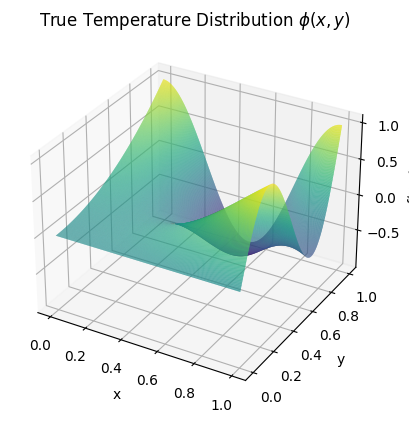

In [8]:
# Plot the 3D plot of phi(x,y) to visualize the true temperature distribution
x_plot = np.linspace(0,1,400)
y_plot = np.linspace(0,1,400)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = phi(X_plot, Y_plot)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1,
                cmap="viridis", edgecolor="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title(r"True Temperature Distribution $\phi(x,y)$")
plt.show()

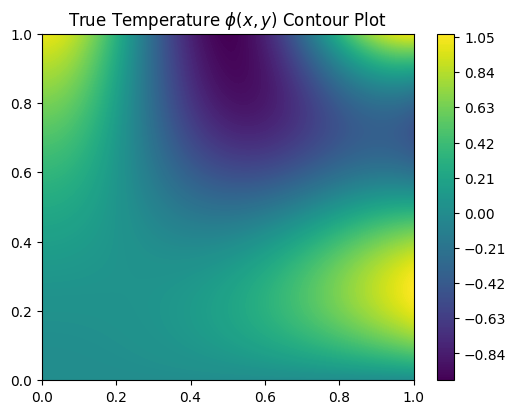

In [9]:
# Plot a contour plot of the temperatures, as if the temperatures were on display on a 2D metal plate
fig = plt.figure(figsize=(6,4.5))
plt.contourf(X_plot, Y_plot, Z_plot, 250, cmap='viridis')
plt.colorbar()
plt.title(r"True Temperature $\phi(x,y)$ Contour Plot")
plt.show()

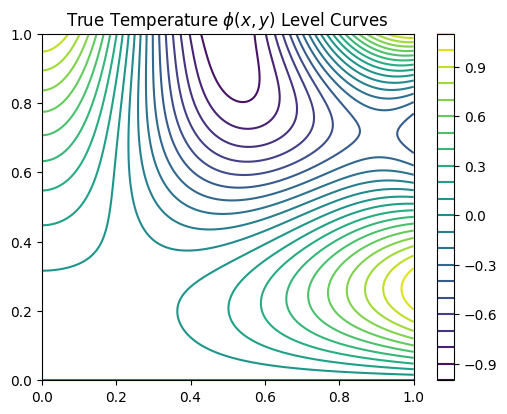

In [10]:
# Plot the level curves for 10 separate true phi(x,y) values
fig = plt.figure(figsize=(6,4.5))
plt.contour(X_plot, Y_plot, Z_plot, 20, cmap='viridis')
plt.colorbar()
plt.title(r"True Temperature $\phi(x,y)$ Level Curves")
plt.show()

However, in the context of the problem, we are given $f(x,y)$, and our goal is to find $\phi$. We are also given the boundary conditions for $\phi(x,y)$. We know that:

$$ 
\begin{gather*}
\phi(x,0) = 0 \\
\phi(x,1) = \cos(2\pi x) \\
\phi(0,y) = y^2 \\
\phi(1,y) = \sin(2 \pi y) + y^2

\end{gather*}
$$

In [11]:
# Set up boundary x,y values
xa = 0.0
xb = 1.0
ya = 0.0
yb = 1.0

By solving the Poisson equation for $\phi$ for all of the values inside our boundary conditions, we can determine the temperature distribution within our metal plate. In the real world, finding our temperature distribution $\phi$ can be used to analyze and design thermal systems, such as an electronic component for instance.

## **Using the Finite Difference Method to Solve the Equation**

### **Theoretical Overview**

It can be extremely difficult to solve directly for $\phi(x,y)$ analytically given $f(x,y)$. Instead, it's necessary in a lot of cases to employ numerical methods that consistently work in approximating these values for both computational efficiency and accuracy. Especially in situations where we have complex boundaries, need to calculate several values, or have an extremely complex $f(x,y)$, we should leverage numerical methods to solve these kinds of problems, instead of solving them analytically.

The method that I will employ is called the Finite Difference method. The Finite Difference method is an extension of the Center Difference method, which is a way to calculate a derivative numerically. The formula for the Center Difference is as follows:

$$

\begin{gather*}
g'(a) ≈ \frac{g(a+h) - g(a-h)}{2h}
\end{gather*}

$$

We use this equation, because it is second order accurate $\mathcal{O}(h^2)$. This basically means that it has a smaller truncation error, as opposed to $g'(a) ≈ \frac{g(a+h) - g(a)}{h}$, which is first order accurate $\mathcal{O}(h)$. This terminology of order is derived from the derivation of the center and forward difference formulas, which come from the Taylor series of $g(a+h)$ and $g(a-h)$.

$$
\begin{gather*}
g(a+h)=g(a)+hg'(a)+ \frac{h^2}{2}g''(a)+\mathcal{O}(h^3) \\
g(a-h)=g(a)-hg'(a)+\frac{h^2}{2}g''(a)-\mathcal{O}(h^3)
\end{gather*}
$$

Subtracting the second series from the first series and dividing by the $2h$ term yields the following:

$$

\begin{gather*}
g'(a) = \frac{g(a+h) - g(a-h)}{2h} + \mathcal{O}(h^2).
\end{gather*}

$$

Hence, the Center Difference is 2nd order accurate. 

Solving for $g''(a)$ instead, we use the 3rd order Taylor polynomials of $g(a+h)$ and $g(a-h)$.

$$
\begin{gather*}
g(a+h)=g(a)+hg'(a)+ \frac{h^2}{2}g''(a)+\frac{h^3}{6}g'''(a)+\mathcal{O}(h^4) \\
g(a-h)=g(a)-hg'(a)+\frac{h^2}{2}g''(a)-\frac{h^3}{6}g'''(a)+\mathcal{O}(h^4)
\end{gather*}
$$

By adding these two Taylor polynomials and solving for $g''(a)$, our result yields another 2nd order truncation error.

$$
\begin{gather*}

D_{+}D_{-}g_i = \frac{g(a+h) - 2g(a) + g(a-h)}{h^2} \\ 
= g_i''+ \frac{h^2}{12}g_i^{(4)} + \mathcal{O}(h^4) \\
= g_i'' + \mathcal{O}(h^2).
\end{gather*}
$$

This equation illustrates how we solve for $g''(a)$. However, $g$ is a 1-Dimensional function, and the Poisson function $\phi(x,y)$ is a 2-Dimesional function. The scheme works similarly when taking partial derivatives. Our computational domain is 2-dimensional like a grid, where all of our points we solve for within the domain $D = \{(x, y) : 0 ≤ x, y ≤ 1\}$ are equally spaced from one another, with a distance $h$ separating each points from adjacent points on the $x$ and $y$ axes.  

### **Discretize the Problem**

![here](images/grid.png)

Now dealing with the Finite-Difference Scheme for solving the Poisson equation, let us discretize the problem so that we are solving specifically so we can solve for all individual mesh points within our metal plate domain. Set $h = \frac{1}{n+1}$, where $n$ is equivalent to the number of points on each individual $x$ axis and each individual $y$ axis, excluding the boundary points; $h$ is the mesh size, or the distance between adjacent points on the same axes; $(x_i,y_i) = (i \times h, j \times h)$, for $i,j = 0, ... , n+1$ mesh points.

Additionally, we use $w_{ij}$ as notation for the approximation of $\phi(x_i,y_i)$ for a specific $(i,j)$ pair in $i,j=0,...,n+1$, and $\{w_{ij}\}$ is the set of all these solutions to our boundary value problem within the domain $D = \{(x, y) : 0 ≤ x, y ≤ 1\}$. 

We define the second order accurate approxition of each of these points for $f_{ij} = \frac{\partial ^{2}\phi}{\partial x_{i}^2} + \frac{\partial ^{2}\phi}{\partial y_{j}^2}$ in its discretized form as:

$$
\begin{gather*}

-(D_{+}^{x}D_{-}^{x} + D_{+}^{y}D_{-}^{y})w_{ij} = f_{ij}.

\end{gather*}
$$

In component form, this equation simplifies out to:

$$
\begin{gather*}

\frac{4w_{ij} - w_{i+1,j} - w_{i-1,j} - w_{i,j+1} - w_{i,j-1}}{h^2} = f_{ij}

\end{gather*}
$$

Mathematically, we are just taking the Center Difference for both $\frac{\partial ^{2}\phi}{\partial x_{i}^2}$ and $\frac{\partial ^{2}\phi}{\partial y_{j}^2}$ and adding them together. When looking at the whole picture for each $w_{ij}$, we are just using neighboring values on the $x$ and $y$ axes to calculate $w_{ij}$. Let us take into consideration the 5-point stencil pictured below. 


![here](images/stensil.png)

Our discretized component-form equation for $f_{ij}$ explicitly utilizes all neighboring points above to form a calculation. We use a linear combination of 5 points to approximate the Laplacian. However, there does appear to be cases where more than 1 unknown exists. This phenomenon can be solved when observing points extremely close to the boundary. Take a look at $(i,j)=(1,1)$ in the grid above, for example. 

$$
\begin{gather*}

(i,j) = (1,1) \Rightarrow \frac{4w_{11} - w_{21}- w_{01} - w_{12} - w_{10}}{h^2} = f_{11} \\
\Rightarrow \frac{4w_{11} - w_{21} - w_{12}}{h^2} = f_{11} + \frac{g_{01} + g_{10}}{h^2}

\end{gather*}
$$

Because this is a boundary value problem, we know our boundary conditions, and are thus able to implement them and incorporate them into our solution to find our unknowns. By using this concept, we are able to find the gaps in our problem and solve $w_{ij}$ for all combinations of $i$ and $j$.

Following this pattern for all combinations of $i$ and $j$, we are able to put these values in matrix-form to illustrate the linear combination pattern for solving for all values in the set $\{w_{ij}\}$. 

<img src="images/matrix.png"  width="700" height="400">

This is the $9 \times 9$ matrix we would implement if we were solving for 3 total mesh point for each row and 3 total mesh points for each column. As $n$ increases, $h$ would decrease, and thus cause this matrix to become much larger as we follow the same pattern for more variables. The equation we would be solving for is: 

$$
\begin{gather*}

A_hw_h = f_h,

\end{gather*}
$$

where we have $A_h$ and $f_h$, and we are actively solving for $w_h$.

A problem arises here though. $A_h$ is extremely large. It is a $n^2 \times n^2$ matrix, which is extremely large, and absurdly computationally inefficient to allocate memory for and solve for $w_h$ as $n\rightarrow \infty$ and $h \rightarrow 0$. 

### **Iterative Methods for Solving this Sparse Linear System**

$A_h$ is extremely large, with its total dimension being $n^2 \times n^2$. Thus, it would be impractical to employ a method like Gaussian elimination, because the runtime complexity of that algorithm using this matrix for solving for $w_h$ would be $\mathcal{O}((n^2)^3) = \mathcal{O}(n^6)$. As a result, we need to resort to iterative methods to reduce the runtime complexity as much as we can. Additionaly, instead of storing the $A_h$ matrix as a whole, I instead will employ methods that cause us to store the least amount of values as possible, for the sake of both runtime and space complexity. We are able to do this, because $A_h$ is positive-definite, block tridiagonal, and symmetric.

For the stopping criterion, we continuously iterating through the system and updating our values as long as $\frac{||r_k||_\infty}{||r_0||_\infty} > \epsilon$. In this case, I will use $\epsilon = 1\times 10^{-8}$ as our stopping criterion, ensuring that all elements of our residual norm are much smaller than the maximim element prior to the initial iteration through our while loop. I will also employ each of the iterative methods below for $h = \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{32}, \frac{1}{64}$, so we can directly understand how these algorithms react as $h \rightarrow 0$.

In [12]:
# Generate list of h's that we will use later on
nh = 6
h_list = [ 2**(-k-1) for k in range(nh) ]

# Indicate tolerance
tolerance = 1e-8

#### **The Jacobi Method**

The Jacobi method is an iterative method for solving linear equations, and it is formed by: 

$$
\begin{gather*}

Dx_{k+1} = -(L+U)x_k + b,

\end{gather*}
$$

where $B_J = -D^{-1}(L+U)$, making it easy to solve for $x_{k+1}$. For our purposes, in component form with $A_hw_h=f_h$, the equation is written as:

$$
\begin{gather*}

w_{ij}^{(k+1)} = \frac{1}{4}((w_{i+1,j}^{(k)} + w_{i-1,j}^{(k)} + w_{i,j+1}^{(k)} + w_{i,j-1}^{(k)}) - f_{ij}h^2)

\end{gather*}
$$

Given the mesh size $h$, the Jacobi method converges decently fast, because the spectral radius $\rho(B_J) = \cos(\pi h) \sim 1-\frac{1}{2}\pi^2h^2$. The spectral radius is basically the asymptotic ratio of error norms for iterations $k$ and $k-1$ as $k \rightarrow \infty$. In limit form, our error norm ratio converges to $\displaystyle{\lim_{k \to \infty}} \frac{||e_k||}{||e_{k-1}||}$.

We can see that the runtime complexity, while still large, is $\mathcal{O}((n^2)^2) = \mathcal{O}(n^4)$. That is faster than Gaussian elimination, but still slow. Let's code this phenomenon and visualize both graphically and in a tabular format how our approximation works with the Jacobi method with different $h$ values, as well as the convergence as our iteration count $k$ increases.

        h       error       ratio       order
 0.500000  0.36685028  0.00000000  0.00000000
 0.250000  0.15701755  2.33636477  1.22426553
 0.125000  0.03859095  4.06876643  2.02459147
 0.062500  0.00984541  3.91968728  1.97073856
 0.031250  0.00245905  4.00375488  2.00135365
 0.015625  0.00061246  4.01506030  2.00542165


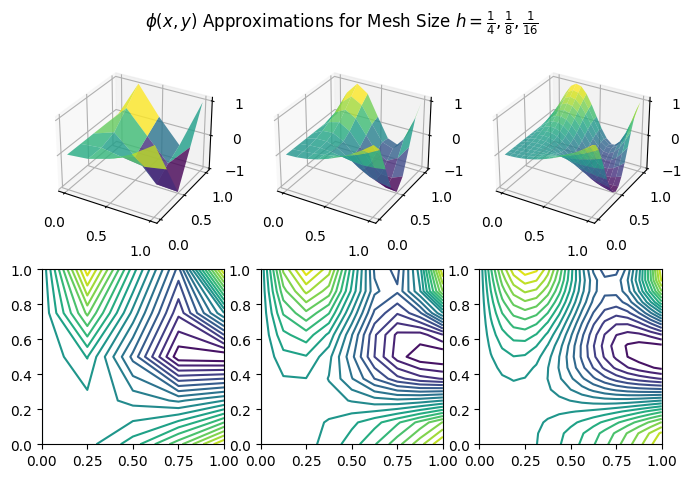

CPU times: user 7min 24s, sys: 2.33 s, total: 7min 26s
Wall time: 7min 25s


In [13]:
%%time

# Prepare figure & table
fig = plt.figure(figsize=(8,5))
fig.suptitle(r"$\phi(x,y)$ Approximations for Mesh Size $h=\frac{1}{4},\frac{1}{8},\frac{1}{16}$")
jacobiTableError = np.zeros((nh, 4))
print(8*" " + "h" + 7*" " + "error" + 7*" " + "ratio" + 7*" " + "order")

# Table iteration variable
tab = 0

# Iterate through each individual h-value
for h in h_list:
    # Calculate number of discretized values inside our boundary for rows and columns
    nx = int((xb - xa) / h) - 1
    ny = int((yb - ya) / h) - 1

    # Allocate memory
    x = np.linspace(xa, xb, nx + 2)
    y = np.linspace(ya, yb, ny + 2)
    w_before = np.zeros((nx+2, ny+2))
    w_after = np.zeros((nx+2, ny+2))
    w_exact = np.zeros((nx+2, ny+2))
    residuals = np.zeros((nx+2, ny+2))


    # Specify boundary conditions
    for i in range(nx+2):
        w_before[i,0] = phi(x[i], y[0])
        w_before[i,ny+1] = phi(x[i], y[ny+1])
    
    for j in range(ny+2):
        w_before[0,j] = phi(x[0], y[j])
        w_before[nx+1,j] = phi(x[nx+1], y[j])
    
    w_after = w_before.copy() # pass by value

    # Exact values of phi(x,y) for comparison purposes
    for i in range(nx+2):
        for j in range(ny+2):
            w_exact[i,j] = phi(x[i], y[j])
    
    # Declare ratio and iteration count
    ratio = 1.0
    k = 0

    # Begin iteration
    while ratio > tolerance:
        k += 1

        # Calculate residual
        for i in range(1, nx+1): # all interior combinations of i,j
            for j in range(1, ny+1):
                residuals[i,j] = f(x[i], y[j]) + (4 * w_before[i,j] - w_before[i+1,j] \
                - w_before[i-1,j] - w_before[i,j+1] - w_before[i,j-1]) / (h**2)
        
        # Identify residual infinity norm 
        residual_norm = np.max(np.abs(residuals))

        # Initialize first residual norm and edit residual ratio
        if k == 1:
            r0 = residual_norm
        ratio = residual_norm / r0

        # Update solution
        for i in range(1, nx+1): 
            for j in range(1, ny+1):
                w_after[i,j] = (w_before[i+1,j] + w_before[i-1,j] \
                + w_before[i,j+1] + w_before[i,j-1] - ((h**2) * f(x[i], y[j]))) / 4

        # Update w^(k) to w^(k+1)
        w_before = w_after.copy()

    # Edit values of table and print it to the table
    jacobiTableError[tab,0] = k # swap count
    jacobiTableError[tab,1] = np.max(np.abs(w_exact - w_before))

    if tab >= 1:
        jacobiTableError[tab,2] = jacobiTableError[tab-1,1] / jacobiTableError[tab,1]
        jacobiTableError[tab,3] = log(jacobiTableError[tab,2], 2)
    
    print(f"{h:9.6f}{jacobiTableError[tab,1]:12.8f}{jacobiTableError[tab,2]:12.8f}{jacobiTableError[tab,3]:12.8f}")

    # Plot our points
    if tab in [1, 2, 3]:
        xx, yy = np.meshgrid(x,y)
        ax = fig.add_subplot(int('23' + str(tab)), projection = '3d')
        ax.plot_surface(xx, yy, w_before, cmap = 'viridis', alpha = 0.8)
        ax = fig.add_subplot(int('23' + str(tab+3)))
        ax.contour(xx, yy, w_before, 20)
    tab += 1

plt.show()

These graphs help us illustrate how our algorithm becomes more accurate as we decrease our mesh size $h$. As $h \rightarrow 0$, $n \rightarrow \infty$. The plot where $h = \frac{1}{16}$ resembles the true temperature distribution $\phi(x,y)$ much better than $h=\frac{1}{4}$, however the pattern of the temperature distribution can still be inferred from it regardless. 


The CPU time of the finite element method using the Jacobi iterative solver is 7 minutes and 24 minutes for all of our calculation combined, with the vast majority of the time being allocated towards the $h=\frac{1}{64}$ calculation. This makes sense, given the algorithm's time complexity is $\mathcal{O}(n^4)$. 

Per our table, the error converges towards 0 as $h$ decreases, signifying how our discretized calculation of all the points resembles the true function as $h$ decreases in magnitude. The ratio $\frac{||e_k||_\infty}{||e_{k-1}||_\infty}$ converges to $\rho(B_J)$ as $k \rightarrow \infty$, and this phenomenon can be seen in the table as it approaches $4$. Also, the finite difference method yields a 2nd order truncation error, and we can see through $\log_2(\frac{||e_k||_\infty}{||e_{k-1}||_\infty})$ that this phenomenon holds.



#### **The Gauss-Seidel (GS) Method**

The Gauss-Seidel method is similar to the SOR method, and it is formed by:

$$
(L+D)x_{k+1} = -Ux_k+b
$$

where $B_{GS}=-(L+D)^{-1}U$.  In component form for the equation $A_hw_h=f_h$ in this discretized problem, our formula is: 

$$
\begin{gather*}

w_{ij}^{(k+1)} = \frac{1}{4}((w_{i+1,j}^{(k)} + w_{i-1,j}^{(k+1)} + w_{i,j+1}^{(k)} + w_{i,j-1}^{(k+1)}) - f_{ij}h^2)

\end{gather*}
$$

The formula for the Gauss-Seidel method is almost identical to the Jacobi method component form, except it utilizes the $(k+1)$ elements in the 5-point stencil calculation immediately after it is calculated. 

Given the mesh size $h$, the Gauss-Seidel method converges faster than the Jacobi method, because the spectral radius $\rho(B_{GS}) = \cos^2(\pi h) \sim 1-\pi^2h^2$, which denotes the direction in which our error norm ratio converges to as $h \rightarrow \infty$. The total cost of our method is still $\mathcal{O}(n^4)$, so we should still expect a large sum of time in solving for $w_h$ in the equation $A_hw_h=f_h$.

In [14]:
%%time

# Prepare figure & table
gsTableError = np.zeros((nh, 4))
print(8*" " + "h" + 7*" " + "error" + 7*" " + "ratio" + 7*" " + "order")

# Table iteration variable
tab = 0

# Iterate through each individual h-value
for h in h_list:
    # Calculate number of discretized values inside our boundary for rows and columns
    nx = int((xb - xa) / h) - 1
    ny = int((yb - ya) / h) - 1

    # Allocate memory
    x = np.linspace(xa, xb, nx+2)
    y = np.linspace(ya, yb, ny+2)
    w = np.zeros((nx+2, ny+2))
    w_exact = np.zeros((nx+2, ny+2))
    residuals = np.zeros((nx+2, ny+2))

    # Specify boundary conditions
    for i in range(nx+2):
        w[i,0] = phi(x[i], y[0])
        w[i,ny+1] = phi(x[i], y[ny+1])
    
    for j in range(ny+2):
        w[0,j] = phi(x[0], y[j])
        w[nx+1,j] = phi(x[nx+1], y[j])
    
    # Exact values of phi(x,y) for comparison purposes
    for i in range(nx+2):
        for j in range(ny+2):
            w_exact[i,j] = phi(x[i], y[j])
    
    # Declare ratio and iteration count
    ratio = 1.0
    k = 0

    # Begin iteration
    while ratio > tolerance:
        k += 1

        # Calculate residual
        for i in range(1, nx+1): # all interior combinations of i,j
            for j in range(1, ny+1):
                residuals[i,j] = f(x[i], y[j]) + (4*w[i,j] - w[i+1,j] - w[i-1,j] \
                - w[i,j+1] - w[i,j-1]) / (h**2)
        
        # Identify residual infinity norm 
        residual_norm = np.max(np.abs(residuals))

        # Initialize first residual norm and edit residual ratio
        if k == 1:
            r0 = residual_norm
        ratio = residual_norm / r0

        # Update solution
        for i in range(1, nx+1): 
            for j in range(1, ny+1):
                w[i,j] = (w[i+1,j] + w[i-1,j] + w[i,j+1] + w[i,j-1] - ((h**2) * f(x[i], y[j]))) / 4

    # Edit values of table and print it to the table
    gsTableError[tab,0] = k # swap count
    gsTableError[tab,1] = np.max(np.abs(w_exact - w))

    if tab >= 1:
        gsTableError[tab,2] = gsTableError[tab-1,1] / gsTableError[tab,1]
        gsTableError[tab,3] = log(gsTableError[tab,2], 2)
    
    print(f"{h:9.6f}{gsTableError[tab,1]:12.8f}{gsTableError[tab,2]:12.8f}{gsTableError[tab,3]:12.8f}")
    tab += 1 # Increment table index

print("")

        h       error       ratio       order
 0.500000  0.36685028  0.00000000  0.00000000
 0.250000  0.15701755  2.33636472  1.22426551
 0.125000  0.03859096  4.06876542  2.02459110
 0.062500  0.00984543  3.91968191  1.97073658
 0.031250  0.00245908  4.00369815  2.00133321
 0.015625  0.00061252  4.01469507  2.00529041

CPU times: user 3min 47s, sys: 837 ms, total: 3min 48s
Wall time: 3min 48s


As we can see, the values in our Gauss-Seidel tabel for $h=\frac{1}{2}, \frac{1}{4}, ... , \frac{1}{64}$ are almost identical to the Jacobi method. Thus, the computation of more plots is not necessary, because the plots would look almost identidal to the Jacobi approximation plots for $\{w_{ij}\}$. We obtain the same answers for ratio and order as we did in the Jacobi calculation, showing that the truncation error is still of a 2nd order magnitude, and the error norm ratio is still equal to 4. We are still using the same $A_h$ for the finite difference calculations, so this phenomenon makes sense.

However, the CPU time of the Gauss-Seidel method is almost twice as fast as the Jacobian calculation at 3 minutes and 47 seconds, as opposed to 7 minutes and 24 seconds. A large chunk of that time was still concentrated in the $h={1}{64}$ case, which makes sense because of our algorithm's $\mathcal{O}(n^4)$ time complexity. The time essentially being cut in half in comparison to the Jacobi is a result of $\rho(B_{GS}) \sim 1-\pi^2h^2$, as opposed to $\rho(B_{J}) \sim 1-\frac{1}{2}\pi^2h^2$. 

In our code, we also save space complexity using the GS method, because we are only saving one version of $\{w_{ij}\}$, instead of copying all new calculations into a new numpy array.

#### **The Successive Over-Relaxation (SOR) Method**

While GS was an improvement over the Jacobi method, it was still flawed as an $\mathcal{O}(n^4)$ calculation. The Successive Over-Relaxation method is a better alternative to both the Jacobi method and the GS method. The matrix form is as follows:

$$
(\omega_*L + D)x_{k+1}=((1-\omega_*)D-\omega_*U)x_k + \omega_*b
$$

where $B_{\omega_*} = (\omega_*L + D)^{-1}((1-\omega_*)D - \omega_*U)$, and $\omega_*$ is an optimized parameter that is equivalent to $\omega_* = \frac{2}{1+\sqrt{1 - \rho(B_J)^2}}$. The parameter $\omega_*$ is an optimal parameter in the sense that 

$$
\rho(B_{\omega_*}) = \min_{0 < \omega < 2} \rho(B_{\omega}) = \omega_* - 1 < \rho(B_{GS}) < \rho(B_J) < 1
$$

In component form for the finite difference method $A_hw_h=f_h$, the iterative method is as follows:

$$
w_{ij}^{(k+1)} = w_{ij}^{(k)} + \frac{1}{4} \omega_* (4w_{ij}^{(k)} - w_{i+1,j}^{(k)} - w_{i-1,j}^{(k+1)} - w_{i,j+1}^{(k)} - w_{i,j-1}^{(k+1)} - f_{ij}h^2)
$$

The spectral radius can be denoted as $\rho(B_{\omega_*}) = \frac{1-\sin{\pi h}}{1+\sin{\pi h}} \sim \frac{1-\pi h}{1+\pi h} \sim 1-2\pi h$, showcasing the faster converge than both the GS and Jacobi method. The total runtime complexity of the SOR method in calculating $A_hw_h=f_h$ is $\mathcal{O}(n^3)$, which is a significant jump above GS and Jacobi. 

The code for the SOR method is as follows:

In [15]:
%%time

# Prepare figure & table
sorTableError = np.zeros((nh, 4))
print(8*" " + "h" + 7*" " + "error" + 7*" " + "ratio" + 7*" " + "order")

# Table iteration variable
tab = 0

# Iterate through each individual h-value
for h in h_list:
    # Calculate number of discretized values inside our boundary for rows and columns
    nx = int((xb - xa) / h) - 1
    ny = int((yb - ya) / h) - 1

    # Calculate w_optimized
    optimized_omega = 2 / (1 + np.sqrt(1 - np.cos(pi*h)**2))

    # Allocate memory
    x = np.linspace(xa, xb, nx+2)
    y = np.linspace(ya, yb, ny+2)
    w = np.zeros((nx+2, ny+2))
    w_exact = np.zeros((nx+2, ny+2))
    residuals = np.zeros((nx+2, ny+2))

    # Specify boundary conditions
    for i in range(nx+2):
        w[i,0] = phi(x[i], y[0])
        w[i,ny+1] = phi(x[i], y[ny+1])
    
    for j in range(ny+2):
        w[0,j] = phi(x[0], y[j])
        w[nx+1,j] = phi(x[nx+1], y[j])
    
    # Exact values of phi(x,y) for comparison purposes
    for i in range(nx+2):
        for j in range(ny+2):
            w_exact[i,j] = phi(x[i], y[j])
    
    # Declare ratio and iteration count
    ratio = 1.0
    k = 0

    # Begin iteration
    while ratio > tolerance:
        k += 1

        # Calculate residual
        for i in range(1, nx+1): # all interior combinations of i,j
            for j in range(1, ny+1):
                residuals[i,j] = f(x[i], y[j]) + (4*w[i,j] - w[i+1,j] \
                - w[i-1,j] - w[i,j+1] - w[i,j-1]) / (h**2)
        
        # Identify residual infinity norm 
        residual_norm = np.max(np.abs(residuals))

        # Initialize first residual norm and edit residual ratio
        if k == 1:
            r0 = residual_norm
        ratio = residual_norm / r0

        # Update solution
        for i in range(1, nx+1): 
            for j in range(1, ny+1):
                w[i,j] -= (1/4)*(optimized_omega * (4*w[i,j] - w[i+1,j] \
                - w[i-1,j] - w[i,j+1] - w[i,j-1] + (f(x[i],y[j]) * h**2)))

    # Edit values of table and print it to the table
    sorTableError[tab,0] = k # swap count
    sorTableError[tab,1] = np.max(np.abs(w_exact - w))

    if tab >= 1:
        sorTableError[tab,2] = sorTableError[tab-1,1] / sorTableError[tab,1]
        sorTableError[tab,3] = log(sorTableError[tab,2], 2)
    
    print(f"{h:9.6f}{sorTableError[tab,1]:12.8f}{sorTableError[tab,2]:12.8f}{sorTableError[tab,3]:12.8f}")
    tab += 1 # Increment table index

print("")

        h       error       ratio       order
 0.500000  0.36685028  0.00000000  0.00000000
 0.250000  0.15701756  2.33636468  1.22426548
 0.125000  0.03859098  4.06876300  2.02459025
 0.062500  0.00984557  3.91962799  1.97071674
 0.031250  0.00245973  4.00269781  2.00097270
 0.015625  0.00061531  3.99757929  1.99912665

CPU times: user 12.7 s, sys: 39.1 ms, total: 12.8 s
Wall time: 12.8 s


The table is still pretty much identical to the other methods, showing the overall error ratio and truncation error being the same for $A_hw_h-f_h$ as a calculation as a whole. 

An extremely important thing to note here is the how the CPU time of this method is far better than both Jacobi and GS at 12.8 seconds for *all* calculations of $h$. This phenomenon shows how such big of a jump there is between an $\mathcal{O}(n^3)$ time complexity in comparison to a $\mathcal{O}(n^4)$ time complexity and how important a small big-Oh notation really is. While we did what we could do to minimize the runtime on all our algorithms by not explicitly calculating $A_h$, we still experienced terrible runtimes for GS and Jacobi. The SOR method is simply a superior method because of its significantly faster convergence. 

#### **Comparing Iterative Solvers**

Below is a table of all our iteration counts $k$ for the Jacobi, GS, and SOR methods for $h=\frac{1}{2}, \frac{1}{4}, ... , \frac{1}{64}$.

In [20]:
print(9*" " + "h" + 4*" " + "Jacobi" + 6*" " + "GS" + 4*" " + "SOR")
for i, h in enumerate(h_list):
    print('{:10.7f}{:10d}{:8d}{:7d}'.format(h, int(jacobiTableError[i,0]), int(gsTableError[i,0]), int(sorTableError[i,0])))

         h    Jacobi      GS    SOR
 0.5000000         2       2      2
 0.2500000        49      27     15
 0.1250000       191     101     29
 0.0625000       695     358     56
 0.0312500      2485    1266    109
 0.0156250      8781    4438    228


As we can see, iteration counts increase significantly for the Jacobi method as we continue to decrease $h$. Iterations for GS are also increased by a pretty similar multiple as the Jacobi method as $h \rightarrow 0$. For the SOR method, however, the iterations double every time our mesh size $h$ divides in half. For the others, it seems as if they quadruple. Also, the iteration counts for SOR as a whole are significantly smaller than the rest of the other methods, and we could clearly see this phenomenon play out when comparing the CPU time of each algorithm earlier. 

## **Conclusion**

The Poisson equation can quickly become a difficult problem to solve by hand, especially when we have difficult boundary conditions for $\phi$ and a nuanced $f(x,y)$. Through discretizing the problem and applying the finite difference method, we are able to calculate explicit values within the provided boundaries of $\phi$ and solve for values within our domain explicity. In complex situations, a numerical method can solve for $\phi$ at a much quicker rate than any analytical calculation. Calculating explicit values in our domain can especially help in developing an overall picture for the temperature distribution in our metal plate specifically in this problem, and the error continues to decrease in magnitude as $h \rightarrow 0$.

Through discretization and repeatedly calculating 2nd order derivatives via the finite difference method, we are able to plot a function that looks almost exactly like the true $\phi(x,y)$. An issue that arose, however, was the increase in CPU time and iteration count for all our methods as $h \rightarrow 0$. The increase in runtime and iterations was especially noticable when applying the Jacobi and GS methods for solving for $w_h$ in our discretized $A_hw_h=f_h$ linear equation. Because the dimension of $A_h$ is $(n^2 \times n^2)$, these methods yielded a $\mathcal{O}(n^4)$ runtime complexity, which is better than Gaussian elimination at $\mathcal{O}(n^6)$ but still not very intiutive for large calculations. The Jacobi method spent over 7 minutes calculating $\{w_{ij}\}$ for all our tested values of $h$, with most of the time being concentrated on $h=\frac{1}{64}$. These problems still occurred in calculating GS, with the total CPU time being around 3 and a half minutes. 

We discovered, however, that the SOR method converged much faster than the Jacobi and GS methods. The algorithm's runtime complexity $\mathcal{O}(n^3)$ can still lack intuition for extremely small values of $h$, but this iterative solver for $A_hw_h=f_h$ performed far better than the Jacobi and GS solvers. 

I did not test other iterative methods like GMRES, nor did I apply parallel computing in any capacity in solving for $A_hw_h=f_h$. However, those methods would cause solving for $w_h$ to become even faster. 